# Introduction

**Background of the Study**

Transjakarta is a bus rapid transit (BRT) system operating in the Special Capital Region of Jakarta, Indonesia. Officially launched on **January 15, 2004**, it was the first BRT system in Southeast Asia, established to provide a fast, reliable, and affordable mode of transportation for the residents of Jakarta. The system is operated by **[PT Transportasi Jakarta](https://www.transjakarta.co.id/)**, a regional-owned enterprise responsible for managing and developing the Transjakarta services.

Transjakarta operates a wide range of fleets including standard buses, articulated buses, low-entry buses, electric buses, and smaller feeder buses to accommodate various routes and passenger needs. With its dedicated lanes and integrated system, Transjakarta has become one of the largest BRT systems in the world in terms of route length and daily ridership.

The establishment of Transjakarta aimed to **reduce traffic congestion, improve air quality,** and **enhance the overall public transportation system** in Jakarta. By offering a more efficient and environmentally friendly alternative to private vehicles, Transjakarta plays a crucial role in promoting sustainable urban mobility and addressing the transportation challenges in one of the world’s most densely populated cities.

**Business Problem: Addressing Underage Students Riding Motorcycles Without Licenses**

As a country experiencing a [demographic bonus](https://kominfo.jatimprov.go.id/berita/potensi-bonus-demografi-menyongsong-indonesia-emas-2045), there are several issues that need to be addressed. One of these challenges is the issue faced by the capital city. In Jakarta, a significant number of underage students commute to school using motorcycles without possessing the legally required Surat Izin Mengemudi (SIM), or driver's license. This practice not only contravenes traffic regulations but also poses substantial safety risks. Data from the Korps Lalu Lintas Polri indicates that annually, [approximately 80% of traffic accident fatalities involve individuals from the student or adolescent demographic](https://kbr.id/berita/nasional/remaja-bawa-motor-ke-sekolah-rawan-kecelakaan) . Furthermore, specific incidents, such as the case of a [16-year-old high school student operating a BMW without a license and colliding with a motorcyclist in Tangerang](https://news.detik.com/berita/d-7817172/polisi-siswa-sma-yang-bawa-bmw-tabrak-pemotor-tak-punya-sim?), underscore the gravity of the situation .​

**Objective**

Transjakarta aims to reduce the use of private vehicles among underage students who do not yet possess a valid driver’s license (SIM), by offering a safe, comfortable, and reliable public transportation option. Through service improvements tailored to the needs of students and strategic outreach conducted by the Transjakarta Public Relations team, the initiative seeks to encourage students to choose Transjakarta as their alternative to private transportation. This effort is expected to help minimize instances of unlicensed driving and reduce the risk of traffic accidents involving school-aged individuals.

**Stakeholder**

Transjakarta Public Relations Team
Responsible for external communications.
Develops the core messages of the campaign (e.g., safety, comfort, legality).

Transjakarta Social Media Team
Transforms insights into engaging content for platforms such as TikTok, Instagram, Twitter, etc.
Collaborates with designers and content creators.

Digital Marketing Team
Handles marketing collaborations with external parties to increase youth interest in using TransJakarta.

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import seaborn as sns
from datetime import time as dtime
from google.colab import drive
from IPython.display import Image, display
from scipy.stats import chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

drive.mount('/content/drive')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Understanding

Importing CSV file into a DataFrame

In [284]:
# Ignore this, unless you're running the code on a local or offline connection.
# df = pd.read_csv('Transjakarta.csv')

import gdown
url = 'https://drive.google.com/uc?id=1Qr1hyO8eMPTPm_tCQdq4raPrpl3x6bwj'
output = 'Transjakarta.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())



Downloading...
From: https://drive.google.com/uc?id=1Qr1hyO8eMPTPm_tCQdq4raPrpl3x6bwj
To: /content/Transjakarta.csv
100%|██████████| 8.98M/8.98M [00:00<00:00, 130MB/s]


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


Unique value of every columns.

In [285]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57T..."
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095..."
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, ..."
4,payCardSex,2,"[M, F]"
5,payCardBirthDate,67,"[2008, 1997, 1992, 1978, 1982, 1993, 1974, 199..."
6,corridorID,221,"[5, 6C, R1A, 11D, 12, 1T, JAK.18, nan, B14, 1Q..."
7,corridorName,216,"[Matraman Baru - Ancol, Stasiun Tebet - Karet ..."
8,direction,2,"[1.0, 0.0]"
9,tapInStops,2570,"[P00142, B01963P, B00499P, B05587P, P00239, B0..."


**Dataset Description**

The dataset contains multiple attributes grouped into the following categories:

**1. Transaction Information**
- **transID**: Unique transaction id for every transaction  
- **payAmount**: The number of what customers pay. Some are free. Some not.

**2. Customer Information**
- **payCardID**: Customers main identifier. The card customers use as a ticket for entrance and exit.  
- **payCardBank**: Customers card bank issuer name  
- **payCardName**: Customers name that is embedded in the card.  
- **payCardSex**: Customers sex that is embedded in the card  
- **payCardBirthDate**: Customers birth year

**3. Route Information**
- **corridorID**: Corridor ID / Route ID as key for route grouping.  
- **corridorName**: Corridor Name / Route Name contains Start and Finish for each route.  
- **direction**: 0 for Go, 1 for Back. Direction of the route.

**4. Tap In Information**
- **tapInStops**: Tap In (entrance) Stops ID for identifying stops name  
- **tapInStopsName**: Tap In (entrance) Stops Name where customers tap in.  
- **tapInStopsLat**: Latitude of Tap In Stops  
- **tapInStopsLon**: Longitude of Tap In Stops  
- **stopStartSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.  
- **tapInTime**: Time of tap in. Date and time

**5. Tap Out Information**
- **tapOutStops**: Tap Out (Exit) Stops ID for identifying stops name  
- **tapOutStopsName**: Tap out (exit) Stops Name where customers tap out.  
- **tapOutStopsLat**: Latitude of Tap Out Stops  
- **tapOutStopsLon**: Longitude of Tap Out Stops  
- **stopEndSeq**: Sequence of the stops, 1st stop, 2nd stops etc. Related to direction.  
- **tapOutTime**: Time of tap out. Date and time


In [286]:
print(f'Total row and column on the dataset : {df.shape}')
df.info()

Total row and column on the dataset : (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  obj

Missing Values Percentage on Every Column

In [287]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

                  Missing Values  Percentage
transID                        0    0.000000
payCardID                      0    0.000000
payCardBank                    0    0.000000
payCardName                    0    0.000000
payCardSex                     0    0.000000
payCardBirthDate               0    0.000000
corridorID                  1257    3.316623
corridorName                1930    5.092348
direction                      0    0.000000
tapInStops                  1213    3.200528
tapInStopsName                 0    0.000000
tapInStopsLat                  0    0.000000
tapInStopsLon                  0    0.000000
stopStartSeq                   0    0.000000
tapInTime                      0    0.000000
tapOutStops                 2289    6.039578
tapOutStopsName             1344    3.546174
tapOutStopsLat              1344    3.546174
tapOutStopsLon              1344    3.546174
stopEndSeq                  1344    3.546174
tapOutTime                  1344    3.546174
payAmount 

Visualize Columns with Missing Values using a Heatmap, It is used to simplify the process of imputing missing values through a mapping approach.

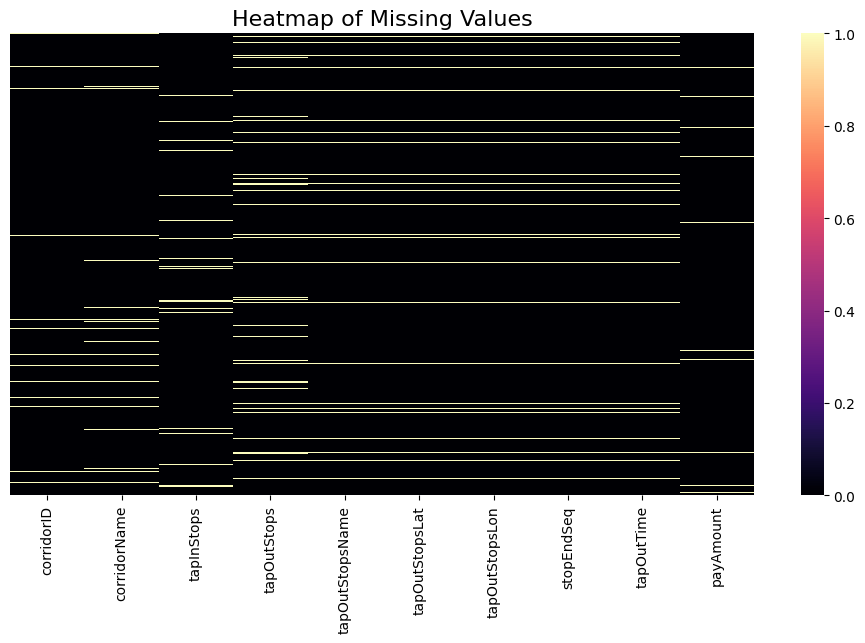

In [288]:
# 1. Select only columns with missing values
cols_with_na = df.columns[df.isnull().any()]
df_missing_only = df[cols_with_na]

# 2. Plot heatmap for all rows, with vertical colorbar enabled
plt.figure(figsize=(12, 6))
sns.heatmap(df_missing_only.isnull(), cbar=True, cmap='magma')

# 3. Customize plot
plt.title('Heatmap of Missing Values', fontsize=16)
plt.xlabel('')
plt.yticks([])  # Optional: remove row ticks to clean up

plt.show()

Visualize Missing Values as a Percentage of the Entire Dataset

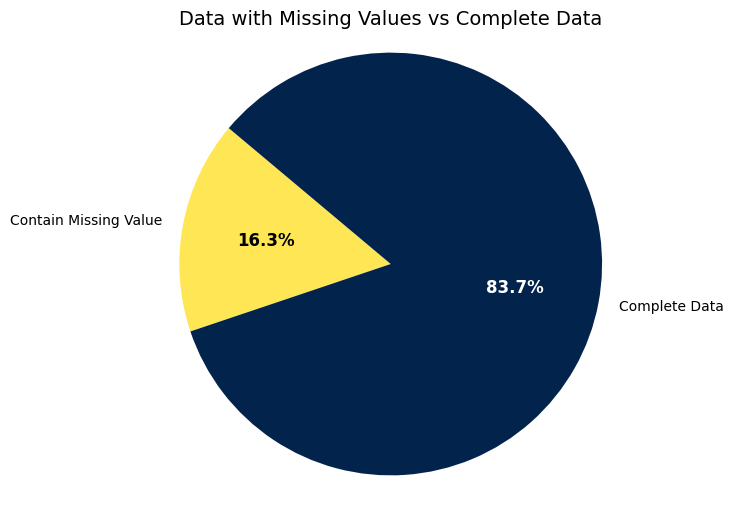

In [289]:
# Calculating Total Rows and Rows with Na
total_rows = len(df)
rows_with_na = df.isnull().any(axis=1).sum()
rows_without_na = total_rows - rows_with_na

# Pie Chart Data
pie_data = [rows_with_na, rows_without_na]
labels = ['Contain Missing Value', 'Complete Data']
colors = ['#fee655', '#02244c']  # Warna soft

# Creating Pie Chart & Labels
plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(
    pie_data, labels=labels, autopct='%1.1f%%',
    colors=colors, startangle=140
)

# Percentage's Text Styling
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')
    if labels[i] == 'Complete Data':
        autotext.set_color('white')

# Title & Styling
plt.title('Data with Missing Values vs Complete Data', fontsize=14)
plt.axis('equal')
plt.show()

# Data Cleaning


Check `corridorName` assigned to multiple `corridorID`

This check helps identify cases where a single `corridorName` is linked to multiple `corridorID`.  
Such inconsistencies can make the data harder to interpret and analyze accurately.

In [290]:
# Indentifying corridorName that assigned into some corridorID
corridor_conflicts = df.groupby('corridorName')['corridorID'].nunique()

# Get only corridorName that assigned into more than one corridorID
conflicting_corridors = corridor_conflicts[corridor_conflicts > 1]

# Create list of the corridorName and corridorID
formatted_conflicts = (
    df[df['corridorName'].isin(conflicting_corridors.index)]
    .groupby('corridorName')['corridorID']
    .unique()
    .reset_index()
)

# Convert the list of corridorID into a string separated by commas
formatted_conflicts['corridorID'] = formatted_conflicts['corridorID'].apply(lambda x: ', '.join(str(i) for i in x))

# Showing result
formatted_conflicts

,corridorName,corridorID
0,Blok M - Kota,"M1, 1"
1,Kalideres - Bundaran HI via Veteran,"M3, 3, nan"
2,Matraman Baru - Ancol,"5, nan, M5"
3,Pinang Ranti - Pluit,"M9, 9, nan"
4,Pulo Gadung - Monas,"2, M2, nan"


Standardizing corridorID based on corridorName

From the previous check, we identified that some `corridorName`s are assigned to multiple `corridorID`.  
To ensure consistency and readability, we will standardize the `corridorID` based on reliable external [sources](https://kumparan.com/jendela-dunia/rute-transjakarta-2024-dan-halte-di-setiap-koridor-22Aip9MOx7Z/3).  
This will be done by creating a dictionary to map each `corridorName` to a single, consistent `corridorID`.

In [291]:
# Mapping dictionary based on the source
corridor_name_to_id = {
    "Blok M - Kota": "1",
    "Kalideres - Bundaran HI via Veteran": "3",
    "Matraman Baru - Ancol": "5",
    "Pinang Ranti - Pluit": "9",
    "Pulo Gadung - Monas": "11"
}

# Applying the corridorID based on corridorName
df['corridorID'] = df.apply(
    lambda row: corridor_name_to_id.get(row['corridorName'], row['corridorID']),
    axis=1
)

target_corridors = [
    "Blok M - Kota",
    "Kalideres - Bundaran HI via Veteran",
    "Matraman Baru - Ancol",
    "Pinang Ranti - Pluit",
    "Pulo Gadung - Monas"
]

# Filter data and count based on corridorName dan corridorID
row_counts = (
    df[df['corridorName'].isin(target_corridors)]
    .groupby(['corridorName', 'corridorID'])
    .size()
    .reset_index(name='row_count')
    .sort_values(by='corridorName')
)

row_counts

,corridorName,corridorID,row_count
0,Blok M - Kota,1,291
1,Kalideres - Bundaran HI via Veteran,3,332
2,Matraman Baru - Ancol,5,263
3,Pinang Ranti - Pluit,9,209
4,Pulo Gadung - Monas,11,343


Create mapping for unique columns :

*   `corridorID` <-> `corridorName`
*   `tapInStops` <-> `tapInStopsName`
*   `tapOutStops` <-> `tapOutStopsName`



In [292]:
# Create mapping for unique corridorID <-> corridorName
grouped = df.groupby(['corridorID', 'corridorName']).size().reset_index(name='count')
major_corridor_names = grouped.sort_values('count', ascending=False).drop_duplicates('corridorID')
major_corridor_ids = grouped.sort_values('count', ascending=False).drop_duplicates('corridorName')
final_mapping = pd.merge(major_corridor_names, major_corridor_ids, on=['corridorID', 'corridorName'])
unique_corridor_dict = dict(zip(final_mapping['corridorID'], final_mapping['corridorName']))

# Create mapping for unique tapInStops <-> tapInStopsName
grouped_in = df.groupby(['tapInStops', 'tapInStopsName']).size().reset_index(name='count')
major_tapin = grouped_in.sort_values('count', ascending=False).drop_duplicates('tapInStops')
major_tapin_name = grouped_in.sort_values('count', ascending=False).drop_duplicates('tapInStopsName')
final_tapin = pd.merge(major_tapin, major_tapin_name, on=['tapInStops', 'tapInStopsName'])
tapin_dict = dict(zip(final_tapin['tapInStops'], final_tapin['tapInStopsName']))

# Create mapping for unique tapOutStops <-> tapOutStopsName
grouped_out = df.groupby(['tapOutStops', 'tapOutStopsName']).size().reset_index(name='count')
major_tapout = grouped_out.sort_values('count', ascending=False).drop_duplicates('tapOutStops')
major_tapout_name = grouped_out.sort_values('count', ascending=False).drop_duplicates('tapOutStopsName')
final_tapout = pd.merge(major_tapout, major_tapout_name, on=['tapOutStops', 'tapOutStopsName'])
tapout_dict = dict(zip(final_tapout['tapOutStops'], final_tapout['tapOutStopsName']))


Check the dictionary from mapping results



In [ ]:
print("Mapping corridorID -> corridorName")
print(unique_corridor_dict)

print("\nMapping tapInStops -> tapInStopsName")
print(tapin_dict)

print("\nMapping tapOutStops -> tapOutStopsName")
print(tapout_dict)

Reverse mapping in case the target variable contains values while the main column is `Na`



In [294]:
# Create reverse dictionary
reverse_corridor_dict = {v: k for k, v in unique_corridor_dict.items()}
reverse_tapin_dict = {v: k for k, v in tapin_dict.items()}
reverse_tapout_dict = {v: k for k, v in tapout_dict.items()}

# Fill the name based on code
df['corridorName'] = df['corridorID'].map(unique_corridor_dict).fillna(df['corridorName'])
df['tapInStopsName'] = df['tapInStops'].map(tapin_dict).fillna(df['tapInStopsName'])
df['tapOutStopsName'] = df['tapOutStops'].map(tapout_dict).fillna(df['tapOutStopsName'])

# Fill the code based on name
df['corridorID'] = df['corridorName'].map(reverse_corridor_dict).fillna(df['corridorID'])
df['tapInStops'] = df['tapInStopsName'].map(reverse_tapin_dict).fillna(df['tapInStops'])
df['tapOutStops'] = df['tapOutStopsName'].map(reverse_tapout_dict).fillna(df['tapOutStops'])

Check `tapInStopsName` and `tapOutStopsName` with only 1 corridorID

In [295]:
# Get tapInStopsName that appears in only one unique corridorID
tapin_corridor_check = (
    df.groupby('tapInStopsName')['corridorID']
    .nunique()
    .reset_index()
    .rename(columns={'corridorID': 'unique_corridor_count'})
)

# Filter and convert to list
tapin_unique_list = tapin_corridor_check[tapin_corridor_check['unique_corridor_count'] == 1]['tapInStopsName'].tolist()

# Get tapOutStopsName that appears in only one unique corridorID
tapout_corridor_check = (
    df.groupby('tapOutStopsName')['corridorID']
    .nunique()
    .reset_index()
    .rename(columns={'corridorID': 'unique_corridor_count'})
)

# Filter and convert to list
tapout_unique_list = tapout_corridor_check[tapout_corridor_check['unique_corridor_count'] == 1]['tapOutStopsName'].tolist()

# Optional: print lengths
print(f"Number of tapInStopsName with only 1 corridorID: {len(tapin_unique_list)}")
print(f"Number of tapOutStopsName with only 1 corridorID: {len(tapout_unique_list)}")


Number of tapInStopsName with only 1 corridorID: 1926
Number of tapOutStopsName with only 1 corridorID: 1664


Fill the Missing Value on `CorridorID` & `CorridorName` by Mapping from `tapInStopsName`, but make sure the `tapInStopsName` is in `tapin_unique_list`

In [296]:
# Create a reference mapping from tapInStopsName to corridorID and corridorName
mapping_df = df.dropna(subset=['corridorID', 'corridorName', 'tapInStopsName'])

# Filter mapping_df to only include tapInStopsName in tapin_unique_list
mapping_df_filtered = mapping_df[mapping_df['tapInStopsName'].isin(tapin_unique_list)]

# Identify the most frequent combination for each tapInStopsName (from filtered data)
tapin_corridor_map = (
    mapping_df_filtered.groupby(['tapInStopsName', 'corridorID', 'corridorName'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .drop_duplicates('tapInStopsName')
)

# Build dictionaries for mapping
tapin_to_corridorID = dict(zip(tapin_corridor_map['tapInStopsName'], tapin_corridor_map['corridorID']))
tapin_to_corridorName = dict(zip(tapin_corridor_map['tapInStopsName'], tapin_corridor_map['corridorName']))

# Only fill in missing values using filtered mapping
df['corridorID'] = df['corridorID'].fillna(
    df['tapInStopsName'].map(lambda x: tapin_to_corridorID.get(x) if x in tapin_unique_list else None)
)
df['corridorName'] = df['corridorName'].fillna(
    df['tapInStopsName'].map(lambda x: tapin_to_corridorName.get(x) if x in tapin_unique_list else None)
)

Fill the Missing Value on `CorridorID` & `CorridorName` by Mapping from `tapOutStopsName`, but make sure the `tapOutStopsName` is in `tapout_unique_list`

In [297]:
# Create a reference mapping from tapOutStopsName to corridorID and corridorName
mapping_df = df.dropna(subset=['corridorID', 'corridorName', 'tapOutStopsName'])

# Filter mapping_df to only include tapOutStopsName in tapout_unique_list
mapping_df_filtered = mapping_df[mapping_df['tapOutStopsName'].isin(tapout_unique_list)]

# Identify the most frequent combination for each tapOutStopsName (from filtered data)
tapout_corridor_map = (
    mapping_df_filtered.groupby(['tapOutStopsName', 'corridorID', 'corridorName'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .drop_duplicates('tapOutStopsName')
)

# Build dictionaries for mapping
tapout_to_corridorID = dict(zip(tapout_corridor_map['tapOutStopsName'], tapout_corridor_map['corridorID']))
tapout_to_corridorName = dict(zip(tapout_corridor_map['tapOutStopsName'], tapout_corridor_map['corridorName']))

# Only fill in missing values using filtered mapping
df['corridorID'] = df['corridorID'].fillna(
    df['tapOutStopsName'].map(lambda x: tapout_to_corridorID.get(x) if x in tapout_unique_list else None)
)
df['corridorName'] = df['corridorName'].fillna(
    df['tapOutStopsName'].map(lambda x: tapout_to_corridorName.get(x) if x in tapout_unique_list else None)
)

Create a list of Transjakarta Corridors that are Premium Routes. In this case, we can mark which corridors are Premium Routes by checking the `payAmount`,where the Premium Route price is **20,000** per trip

In [298]:
# Filter rows with payAmount = 20000
df_20k = df[df['payAmount'] == 20000]

# Get unique corridorName formatted as list
corridor_20k_list = df_20k['corridorName'].dropna().unique().tolist()

# Print the result
print(corridor_20k_list)

['Cibubur - Balai Kota', 'Bekasi Barat - Kuningan', 'Palem Semi - Bundaran Senayan', 'Cinere - Bundaran Senayan', 'Bintaro - Fatmawati', 'Bekasi Barat - Blok M', 'Cinere - Kuningan', 'Cibubur Junction - Blok M', 'Cibubur - Kuningan', 'BSD Serpong - Fatmawati', 'Tanah Abang - Blok M']


Check the Premium Routes `corridorName` list.

In [299]:
# Filter hanya yang corridorName-nya ada di corridor_20k_list
df_premium_route = df[df['corridorName'].isin(corridor_20k_list)][['corridorName', 'corridorID']]

df_premium_route = df_premium_route.drop_duplicates(subset=['corridorName', 'corridorID']).reset_index(drop=True)

df_premium_route

,corridorName,corridorID
0,Cibubur - Balai Kota,1T
1,Bekasi Barat - Kuningan,B14
2,Palem Semi - Bundaran Senayan,T21
3,Tanah Abang - Blok M,1N
4,Cinere - Bundaran Senayan,D32
5,Bintaro - Fatmawati,S31
6,Bekasi Barat - Blok M,B13
7,Cinere - Kuningan,D31
8,Cibubur Junction - Blok M,1K
9,Cibubur - Kuningan,6P


Double-check the premium routes using info from the official Transjakarta [site](https://transjakarta.co.id/rute). If a route isn't listed there, take it out of the premium list.

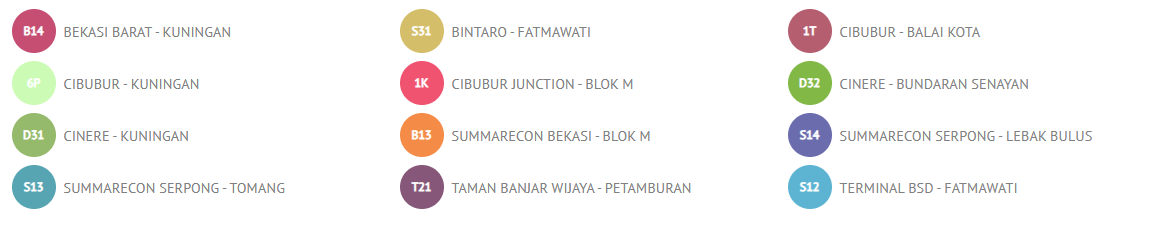

In [300]:
display(Image(filename='/content/drive/MyDrive/Asset Capstone 2/rute_premium.png'))

Before taking out the route, we can observe an anomaly in the `Transjakarta.csv` dataset, where `corridorID` **T21** has the `corridorName` **Palem Semi - Bundaran Senayan**, while in the official data from the Transjakarta website, `corridorID` **T21** corresponds to **Taman Banjar Wijaya - Petamburan**.



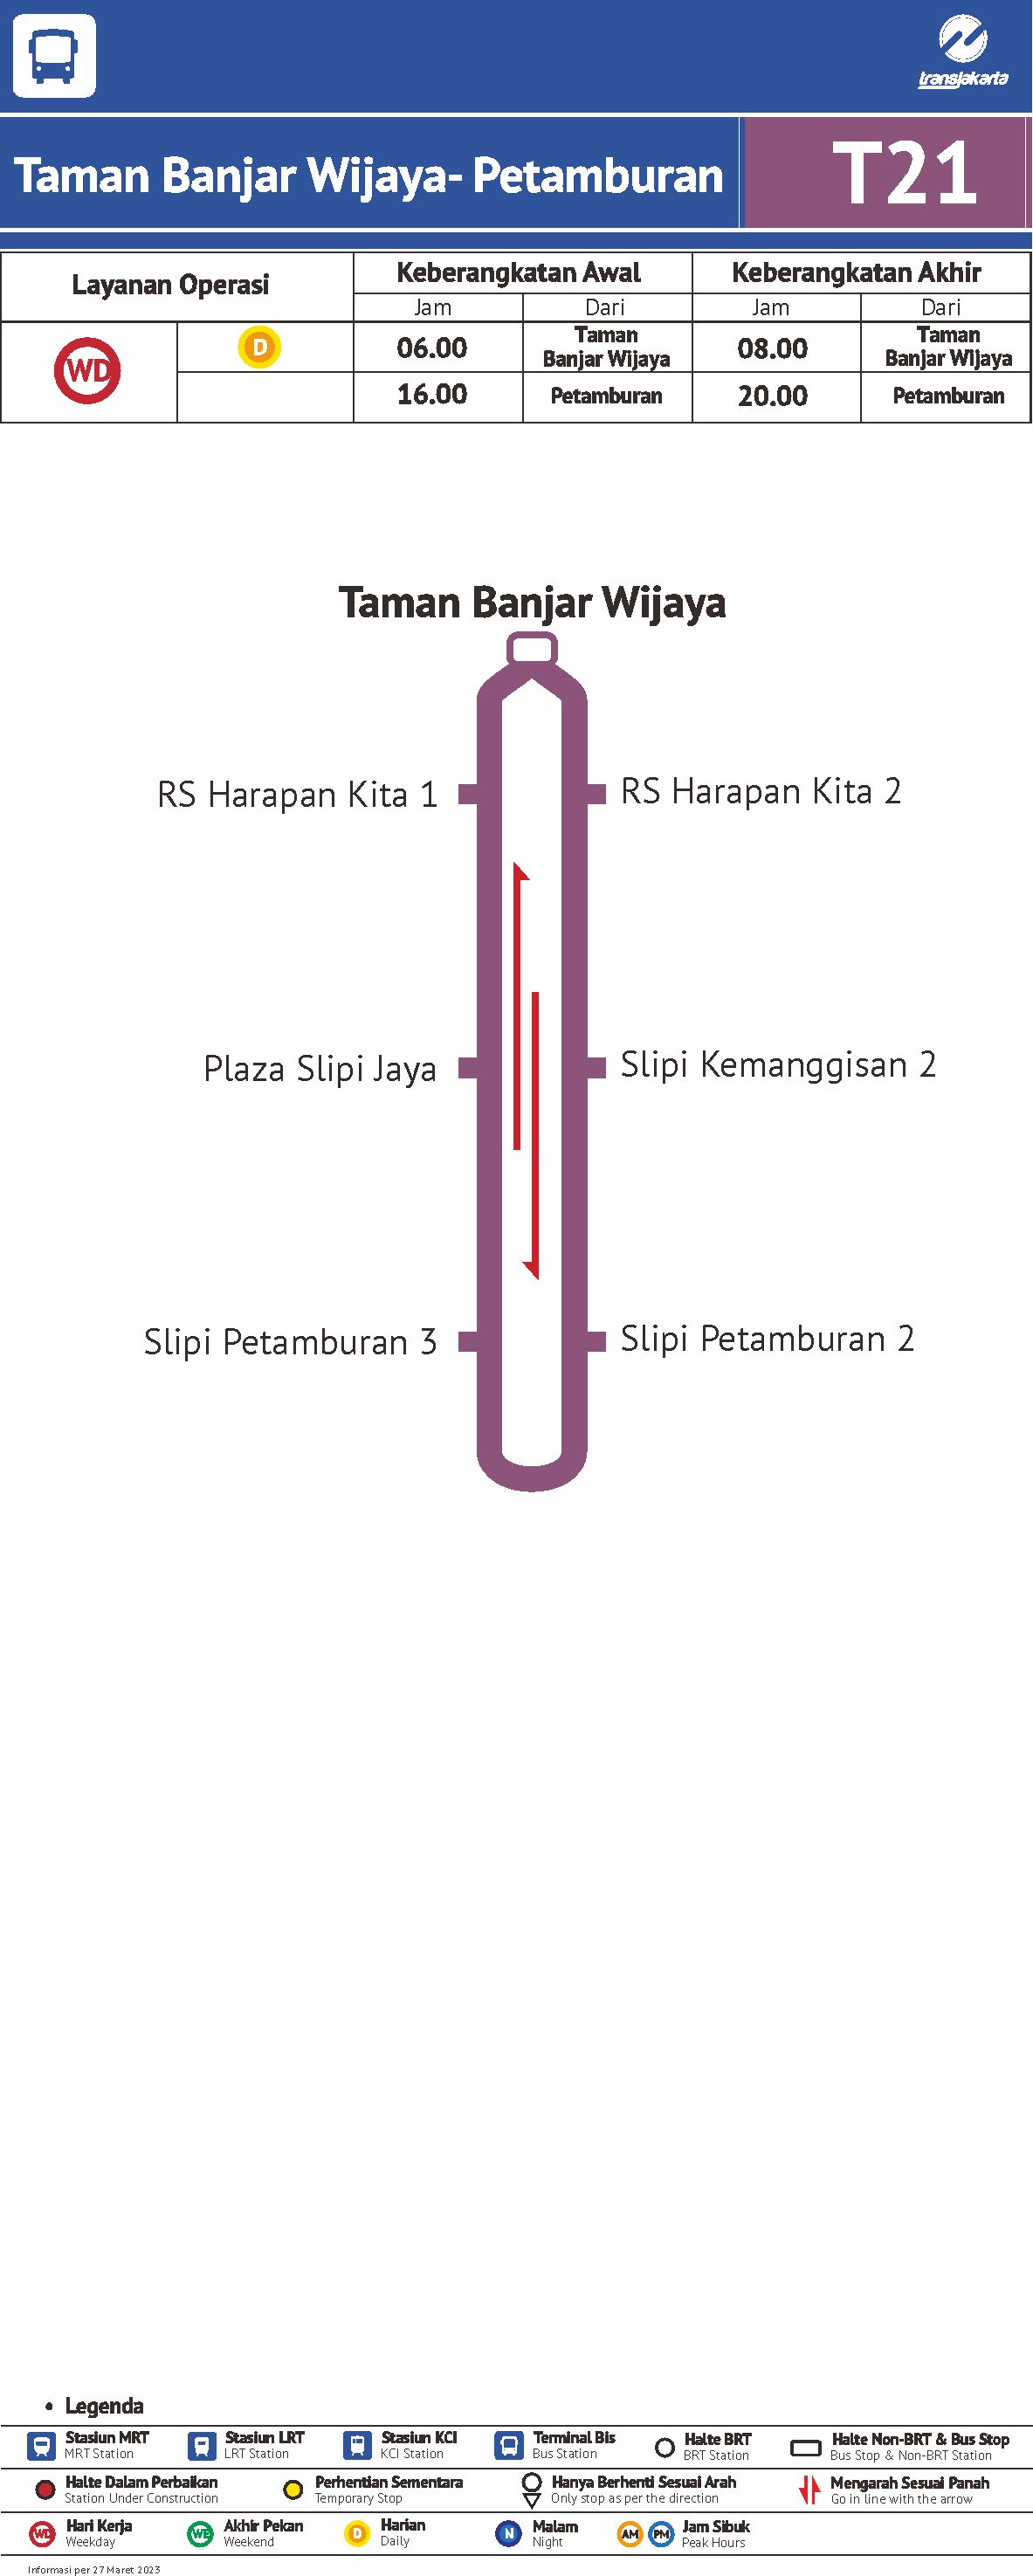

In [301]:
display(Image(filename='/content/drive/MyDrive/Asset Capstone 2/rute_T21.jpg', width = 300))

This requires further checking on the actual route taken by `corridorID` **T21** in the `Transjakarta.csv` dataset, whether it matches the `corridorName` **Palem Semi - Bundaran Senayan** or **Taman Banjar Wijaya - Petamburan**.


In [302]:
# Filter data for corridorID T21
df_t21 = df[df['corridorID'] == 'T21']

# Extract unique stop names from both Tap In and Tap Out columns,
# then combine and remove duplicates
list_corridor_t21 = pd.unique(
    pd.concat([
        df_t21['tapInStopsName'].dropna(),
        df_t21['tapOutStopsName'].dropna()
    ])
).tolist()

# Display the result
list_corridor_t21

['GBK Pintu 7',
 'Islamic',
 'Gelora Bung Karno 1',
 'DPR MPR 2',
 'Bundaran Senayan 1',
 'Bundaran Senayan 2',
 'Tol Kb. Jeruk 1',
 'Slipi Petamburan 3',
 'Senayan JCC 3',
 'Plaza Europa',
 'DPR MPR 1',
 'FX Sudirman',
 'Perpustakaan Riset BPK',
 'Palem Semi 1',
 'Palem Semi 2',
 'Summitmas',
 'Jln. Palem Jepang Baru']

Here are the stop locations from `corridorID` **T21**. However, after cross-checking with the official TransJakarta route information, this route could not be found. Therefore, the decision was made to remove the rows with **T21** as their `corridorID`, as the data appears to be invalid and could compromise the accuracy of the dataset.


In [303]:
df = df[df['corridorID'] != 'T21']
remaining_t21 = df[df['corridorID'] == 'T21']
remaining_t21

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


Now remove **7C - Cibubur - BKN** and **1N Tanah Abang - Blok M** as they are not listed under the premium route category on the official TransJakarta website.

In [304]:
corridor_20k_list = [route for route in corridor_20k_list if route not in ['Cibubur - BKN', 'Tanah Abang - Blok M']]
corridor_20k_list

['Cibubur - Balai Kota',
 'Bekasi Barat - Kuningan',
 'Palem Semi - Bundaran Senayan',
 'Cinere - Bundaran Senayan',
 'Bintaro - Fatmawati',
 'Bekasi Barat - Blok M',
 'Cinere - Kuningan',
 'Cibubur Junction - Blok M',
 'Cibubur - Kuningan',
 'BSD Serpong - Fatmawati']



Fill the missing value of `payAmount` :

*   Non-Premium corridor will filled up with Regular price : **3500**
*   Premium corridor will filled up with Premium price : **20000**

In [305]:
# Make a full copy to avoid SettingWithCopyWarning
df = df.copy()

# Make sure payAmount is numeric
df['payAmount'] = pd.to_numeric(df['payAmount'], errors='coerce')

# Identify premium routes
is_premium_route = df['corridorName'].isin(corridor_20k_list)

# Set payAmount to 20000 for premium routes (even if originally 0 or NaN)
df.loc[is_premium_route, 'payAmount'] = 20000

# For non-premium routes with missing payAmount → fill with 3500
is_non_premium = ~is_premium_route
is_missing = df['payAmount'].isna()
df.loc[is_non_premium & is_missing, 'payAmount'] = 3500

There are non-premium routes with a `payAmount` value of **0**. These zero values will be replaced with the regular fare of **3500**, but only if the `payCardBank` is **not** from Bank DKI. This adjustment is made because only cards issued by Bank DKI are eligible for the [free fare policy](https://smartcity.jakarta.go.id/id/blog/gratis-naik-transjakarta-untuk-kamu-dengan-15-kriteria-ini/) on TransJakarta.

However, make sure that rows updated to **3500** do not contain "JAK" in the corridorID, as "JAK" is the code for Jaklingko routes, which had a **0** rupiah fare prior to July 1, 2023 as part of a [free fare](https://economy.okezone.com/read/2024/08/03/320/3043772/apakah-jaklingko-masih-gratis-yuk-cek-infonya?page=all) program.


In [306]:
zero_pay_count = (df['payAmount'] == 0).sum()
zero_pay_count

np.int64(16648)

In [307]:
# Update payAmount to 3500 if:
# - payAmount is 0
# - payCardBank is not 'dki' (case-insensitive)
# - corridorID does NOT contain the word 'JAK' (case-insensitive)
df.loc[
    (df['payAmount'] == 0) &
    (df['payCardBank'].str.lower() != 'dki') &
    (~df['corridorID'].str.upper().str.contains('JAK', na=False)),
    'payAmount'
] = 3500

# Count how many payAmount values are still 0
zero_pay_count = (df['payAmount'] == 0).sum()
zero_pay_count

np.int64(15129)

Check remaining missing value percentage.

In [308]:
# Calculate the total and percentage of missing values per column
missing_info = df.isna().sum().to_frame(name='missing_count')
missing_info['percent'] = (missing_info['missing_count'] / len(df)) * 100

# Optionally filter to only show columns that have missing values
missing_info = missing_info[missing_info['missing_count'] > 0]

# Display the result, sorted by percentage of missing values in descending order
print(missing_info.sort_values('percent', ascending=False))

                 missing_count   percent
tapOutStops               1360  3.605419
stopEndSeq                1341  3.555049
tapOutStopsName           1341  3.555049
tapOutStopsLon            1341  3.555049
tapOutStopsLat            1341  3.555049
tapOutTime                1341  3.555049
corridorName               474  1.256594
corridorID                 456  1.208876
tapInStops                  34  0.090135


**Drop the remaining missing values, as they may affect the accuracy of the data.**

These columns need to contain accurate information, since the analysis focuses on how students use Transjakarta for transportation to and from school.

In [309]:
df.dropna(inplace=True)

# Duplicate Data checker

Duplicate check on every row

In [310]:
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]
if duplicate_count > 0:
    print(f"Total duplicate data: {duplicate_count}")
else:
    print("There are no duplicate data on this DataFrame.")


There are no duplicate data on this DataFrame.


Duplicate check on `transID` column

In [311]:
duplicate_count = df['transID'].duplicated().sum()
print(f"Number of duplicate transIDs: {duplicate_count}")

Number of duplicate transIDs: 0


# Data Anomaly

In [312]:
# Check payCardName entries that are associated with more than one payCardBank
multiple_banks = df.groupby('payCardName')['payCardBank'].nunique()
multiple_banks = multiple_banks[multiple_banks > 1]

# Display the result
print("payCardName(s) with more than one associated payCardBank:")
display(multiple_banks)

payCardName(s) with more than one associated payCardBank:


,payCardBank
payCardName,
Cengkal Lestari,2
Fathonah Saefullah,2
Leo Wastuti,2
Rahayu Prabowo,2


In [313]:
# 1. Identify payCardNames associated with more than one payCardBank
multiple_banks = df.groupby('payCardName')['payCardBank'].nunique()
multiple_banks = multiple_banks[multiple_banks > 1]

# 2. Filter rows where payCardName is linked to more than one bank
filtered_df = df[df['payCardName'].isin(multiple_banks.index)]

# 3. Keep only unique rows based on payCardID
unique_by_card_id = filtered_df.drop_duplicates(subset='payCardID')

# 4. Select the columns to be displayed
columns_to_display = ['payCardID', 'payCardBank', 'payCardName', 'payCardSex', 'payCardBirthDate']
result_duplicate_payCardName = unique_by_card_id[columns_to_display].copy()

# 5. Add a column for totalTransactionByCard (total transactions made with each card)
transaction_counts = df['payCardID'].value_counts()
result_duplicate_payCardName['totalTransactionByCard'] = result_duplicate_payCardName['payCardID'].map(transaction_counts)

# 6. Create a rutePerjalanan column showing a dictionary {corridorName: count}
rute_dict = df.groupby('payCardID')['corridorName'].value_counts().unstack(fill_value=0)
rute_dict = rute_dict.apply(lambda row: row[row > 0].to_dict(), axis=1)

# Merge route data into the main result dataframe
result_duplicate_payCardName['travelRoute'] = result_duplicate_payCardName['payCardID'].map(rute_dict)

# 7. Display the final result
result_duplicate_payCardName


,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,totalTransactionByCard,travelRoute
22,676293109036,flazz,Fathonah Saefullah,M,1983,40,{'Ragunan - Gelora Bung Karno': 40}
12119,4992399872617,online,Cengkal Lestari,M,1970,40,{'Kp. Rambutan - Kalisari': 40}
12358,180044335370375,emoney,Leo Wastuti,M,2007,38,{'Rusun Sindang Koja - Kp. Sawah': 38}
12461,2402313549139274,dki,Rahayu Prabowo,F,1994,40,{'Tanjung Priok - Blok M': 40}
12496,4949430360722628,dki,Fathonah Saefullah,F,1996,38,{'Rempoa - Blok M': 38}
32658,676340574497,flazz,Cengkal Lestari,F,1985,4,"{'Cilincing - Rorotan': 1, 'Pasar Minggu - Cig..."
33119,343897458234312,emoney,Rahayu Prabowo,M,1973,3,"{'Pasar Minggu - Velbak': 1, 'Pondok Labu - Bl..."
37602,4839065457731638,dki,Leo Wastuti,F,1991,1,{'Gondangdia - Senen': 1}


There are 4 unique `payCardName`s that are each associated with 2 different `payCardID`s. Several anomalies can be observed here, including significant differences in `totalTransactionByCard`, as well as inconsistencies in `payCardSex` and `payCardBirthDate`.

As a first step, we apply a filter based on `totalTransactionByCard`. I also assume that the filtered `payCardID`s are likely used by different individuals, since their `travelRoute` patterns differ from other `payCardID`s sharing the same `payCardName`.


In [314]:
# Count how many unique payCardIDs are associated with each payCardName
id_counts = result_duplicate_payCardName.groupby('payCardName')['payCardID'].nunique()

# Filter payCardNames that are linked to more than one payCardID
multi_id_names = id_counts[id_counts > 1].index

# Extract rows with those payCardNames
duplicate_id_df = result_duplicate_payCardName[result_duplicate_payCardName['payCardName'].isin(multi_id_names)]

# For each payCardName, get the maximum transaction count
max_txn_per_name = duplicate_id_df.groupby('payCardName')['totalTransactionByCard'].max()

# Merge max transaction info back into the dataframe
duplicate_id_df = duplicate_id_df.merge(max_txn_per_name, on='payCardName', suffixes=('', '_max'))

# Calculate the percentage difference between each card and the max
duplicate_id_df['txn_diff_ratio'] = duplicate_id_df['totalTransactionByCard'] / duplicate_id_df['totalTransactionByCard_max']

# Filter payCardIDs that are NOT the max AND are within 20% difference (i.e., >= 0.80)
filtered_out_ids = duplicate_id_df[
    (duplicate_id_df['txn_diff_ratio'] >= 0.80) &
    (duplicate_id_df['totalTransactionByCard'] < duplicate_id_df['totalTransactionByCard_max'])
]['payCardID'].unique()

# Display the result
print("Filtered payCardIDs (same payCardName, similar transaction count within 20% of the max):")
print(filtered_out_ids)


Filtered payCardIDs (same payCardName, similar transaction count within 20% of the max):
[4949430360722628]


Now it's time to remove `payCardID`s with fewer transactions in cases where a single `payCardName` is associated with multiple `payCardID`s. The goal is to retain only the `payCardID` with the highest transaction count for each name, as inconsistencies have been found in the data — particularly in fields like `payCardSex` and `payCardBirthDate`.

It’s important to note that only `payCardID`s whose total transaction count is **less than or equal to 20%** of the most-used `payCardID` (for the same `payCardName`) will be removed. This threshold is applied to reduce the risk of incorrectly removing valid entries that happen to share the same name.

For example, consider the case of **Fathonah Saefullah**. This name appears on multiple `payCardID`s, including **4949430360722628**, which is marked as having a `payCardSex` of **F**. This is potentially inaccurate, as the name appears to be male. However, since this is a subjective assumption and cannot be confirmed, the data will not be removed on that basis alone.


In [315]:
# Remove rows from the main dataframe where payCardID is in filtered_out_ids
df = df[~df['payCardID'].isin(filtered_out_ids)]

# Optional: Reset index if needed
df = df.reset_index(drop=True)

Checking `payCardID` behavior, make sure the Customer doesn't categorized as free customer yet still got charged or vice versa

*   Have at least one transaction with `payAmount = 0`, **and**
*   Also have another transaction with `payAmount > 0`




In [316]:
# Identify payCardIDs that have at least one transaction with payAmount == 0
zero_payment_ids = df[df['payAmount'] == 0]['payCardID'].unique()

# From those IDs, check which ones also have transactions with payAmount > 0
condition = (df['payCardID'].isin(zero_payment_ids)) & (df['payAmount'] > 0)
mixed_payment_ids = df[condition]['payCardID'].unique()

# Output the result
print(f"Number of payCardIDs with both 0 and >0 payAmount: {len(mixed_payment_ids)}")
print("Example payCardIDs:", mixed_payment_ids[:5])  # show first 5 IDs as example

Number of payCardIDs with both 0 and >0 payAmount: 567
Example payCardIDs: [6539040209758344 2250309611886654 4580278479854954 3543155487538258
  379311975236617]


Remove data where the `payCardName` contains educational or professional titles and the person is under the age of 19 (which is considered the common maximum student age in Indonesia).

Here is the rules to filter the titles.

*   ","
*   "dr."
*   "drg."
*   "drs."



In [317]:
# Calculate age based on the year 2023
df["age"] = 2023 - df["payCardBirthDate"]

# List of titles or markers to look for in names
titles = [",", "dr.", "drg.", "drs."]

# Function to detect if a name contains any of the titles
def contains_title(name):
    name_lower = str(name).lower()
    return any(title in name_lower for title in titles)

# Remove rows where both conditions are met:
# 1) age is less than or equal to 21
# 2) the name contains one of the titles
df = df[~((df["age"] <= 21) & (df["payCardName"].apply(contains_title)))]


In [318]:
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41


# Data Preparation

Convert `tapInTime` and `tapOutTime` columns from object to datetime format for proper time-based analysis.

In [319]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

Create a column `duration_minute` to assist with the analysis of trip duration.

In [320]:
# Calculate trip duration in minutes and create a new column 'duration_minute'
df.loc[:, 'duration_minute'] = ((df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60).round()


Create a column `age` to assist with the analysis of customer age.

In [321]:
df.loc[:,'age'] = 2023 - df['payCardBirthDate']

Export the cleaned data frame into a csv file.

In [322]:
df.to_csv('transjakarta_cleaned.csv', index=False)

# Data Analysis

We filter the DataFrame to a specific time range and days, from **05:00** to **07:00**, as our focus is on the period when students typically commute to school. We also filter the days into weekdays only since the schools are closed on weekends.


In [323]:
# Filter by time: only include records between 05:00 and 07:00
time_filter = (df['tapInTime'].dt.time >= pd.to_datetime("05:00").time()) & \
              (df['tapInTime'].dt.time <= pd.to_datetime("07:00").time())

# Filter by weekday: only include weekdays (Monday = 0 to Friday = 4)
weekday_filter = df['tapInTime'].dt.weekday < 5

# Filter by corridorID: exclude rows where 'corridorID' contains 'JAK'
non_jak_filter = ~df['corridorID'].str.contains("JAK", na=False)

# Combine all filters
morning_filter = time_filter & weekday_filter & non_jak_filter

# Apply the filter to the DataFrame
df_morning = df[morning_filter]

# Display the first 5 rows of the filtered result
df_morning.head(5)


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,duration_minute
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,39.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,57.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,52.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,43.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,39.0


In this step, we are verifying whether the filtered `df_morning` DataFrame contains only weekdays (Monday to Friday). This ensures that no weekend dates (Saturday or Sunday) are included in the morning data.


In [324]:
# Convert to date only
df_morning.loc[:, 'tapInDate'] = df_morning['tapInTime'].dt.date

# Drop duplicates based on the date only
df_morning_single_day = df_morning.drop_duplicates(subset='tapInDate', keep='first')

# Optional: drop the helper column if you don't want to keep it
df_morning_single_day = df_morning_single_day.drop(columns='tapInDate')

df_morning_single_day['tapInTime']

,tapInTime
0,2023-04-03 05:21:44
562,2023-04-04 05:20:48
1125,2023-04-05 05:46:30
1690,2023-04-06 05:46:06
2260,2023-04-07 06:13:24
2832,2023-04-10 06:14:31
3401,2023-04-11 06:08:42
3966,2023-04-12 06:47:01
4533,2023-04-13 05:07:05
5098,2023-04-14 05:12:51


# Analysis by Demographic

This section presents the age distribution of passengers who use Transjakarta during weekday mornings. The analysis focuses on trips made between **05:00** and **07:00 AM** from **Monday** to **Friday**, providing insights into the demographics of early commuters.

In [325]:
def categorize_age(age):
    if 10 <= age <= 18:
        return 'Teenager'
    elif 19 <= age <= 59:
        return 'Adult'
    elif age >= 60:
        return 'Old'
    else:
        return 'Unknown'

# Apply the age category to the DataFrame
df_morning['ageGroup'] = df_morning['age'].apply(categorize_age)

# Count passengers in each age group
desired_order = ['Teenager', 'Adult', 'Old']
age_group_counts = df_morning['ageGroup'].value_counts().reindex(desired_order)

# Create readable labels for display
age_group_labels = {
    'Adult': 'Adult (19–59)',
    'Teenager': 'Teenager (10–18)',
    'Old': 'Old (60+)',
}

# SCreate a new DataFrame from the counts
df_age_group = pd.DataFrame({
    'Age Group': [age_group_labels[grp] for grp in age_group_counts.index],
    'Passengers': age_group_counts.values
})

df_age_group

,Age Group,Passengers
0,Teenager (10–18),660
1,Adult (19–59),4062
2,Old (60+),114


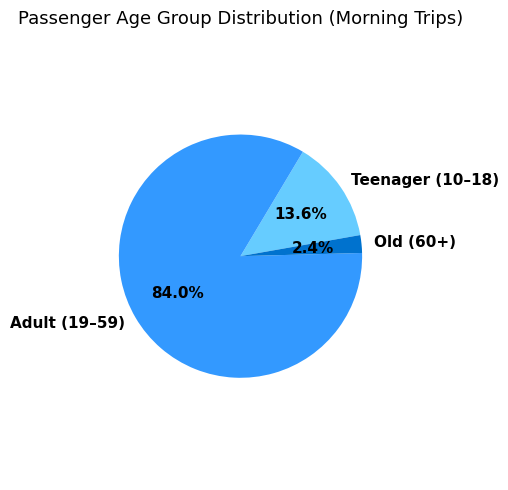

In [326]:
# Plot pie chart with bold and larger labels & percentages
plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    df_age_group['Passengers'],
    labels=df_age_group['Age Group'],
    autopct='%1.1f%%',
    startangle=10,
    colors=['#66CCFF', '#3399FF', '#0072CE']
)

# Make percentage and labels bold and slightly larger
for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Title (not bolded as requested)
plt.title('Passenger Age Group Distribution (Morning Trips)', fontsize=13)
plt.axis('equal')  # Make the pie chart a circle
plt.tight_layout()
plt.show()

The age group with the highest number of Transjakarta users is 'Adult (19–59)', followed by 'Teenager (10–18)', and lastly 'Old (60+)'.

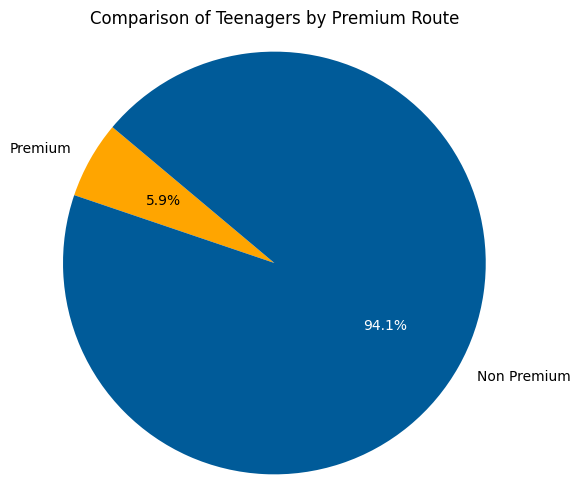

In [327]:
# Filter rows where age is between 10 and 18 (inclusive)
teenagers = df_morning[(df_morning['age'] >= 10) & (df_morning['age'] <= 18)]

# Split into two categories based on payAmount
teen_20k = teenagers[teenagers['payAmount'] == 20000]
teen_other = teenagers[teenagers['payAmount'] != 20000]

# Count the number of entries in each category
count_20k = len(teen_20k)
count_other = len(teen_other)

# Create a pie chart with custom colors
labels = ['Premium', 'Non Premium']
sizes = [count_20k, count_other]
colors = ['#FFA500', '#005B99']  # Orange for Premium, Blue for Non Premium

# Custom function to color text: white for Non Premium (2nd slice)
def custom_autopct(pct):
    return f'{pct:.1f}%'  # just returns the text; color handled separately

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct=custom_autopct,
    startangle=140
)

# Set color of the percentage text
autotexts[0].set_color('black')  # Premium slice
autotexts[1].set_color('white')  # Non Premium slice

ax.set_title('Comparison of Teenagers by Premium Route')
ax.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()

Here we can see that only **5.9%** of all teenagers use the premium route (Royal Trans). This may also be due to the fact that the routes are not as widely available as the non-premium ones, and the price **Rp 20,000** is considered quite expensive for students.

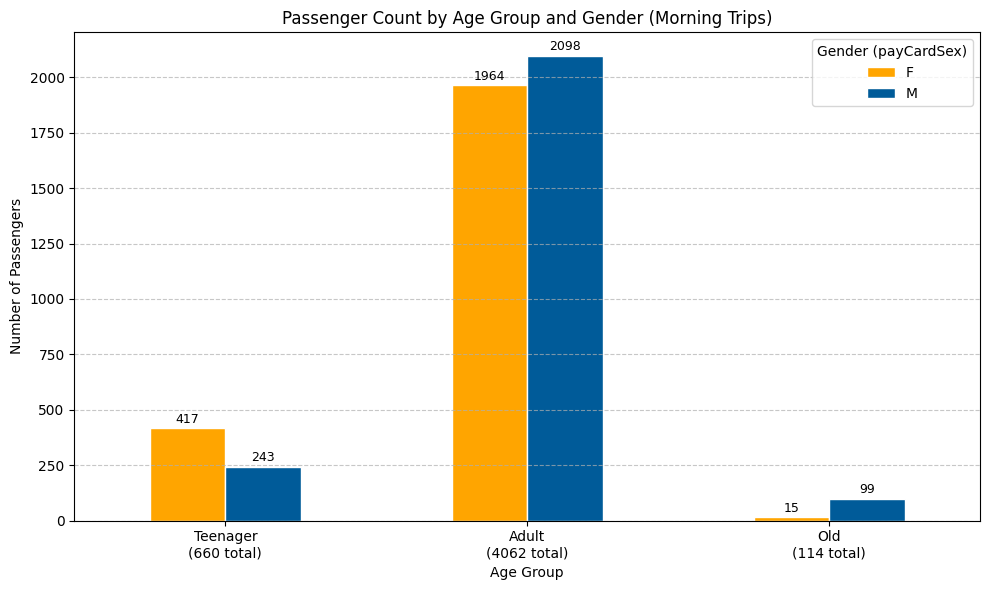

In [328]:
# Group by ageGroup and gender
grouped = df_morning.groupby(['ageGroup', 'payCardSex']).size().unstack(fill_value=0).reindex(['Teenager', 'Adult', 'Old'])

# Custom colors based on gender
colors = []
for gender in grouped.columns:
    if gender == 'F':
        colors.append('#FFA500')  # orange
    else:
        colors.append('#005B99')  # darker blue for male

# Plot
ax = grouped.plot(kind='bar', figsize=(10, 6), edgecolor='white', color=colors)

# Title and labels
plt.title("Passenger Count by Age Group and Gender (Morning Trips)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with value
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + 10,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=9
            )

# Custom x-tick labels with total counts
totals = grouped.sum(axis=1)
custom_labels = [
    f'Teenager\n({totals["Teenager"]} total)',
    f'Adult\n({totals["Adult"]} total)',
    f'Old\n({totals["Old"]} total)'
]
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels, rotation=0)  # No tilt

# Legend
plt.legend(title='Gender (payCardSex)')

plt.tight_layout()
plt.show()


A significant difference can be observed in the Teenager and Old age groups, while the difference in the Adult group appears to be less pronounced. Therefore, a statistical test is needed to determine whether the observed differences are meaningful. The Chi-Square Test is used in this analysis, as the variables involved are categorical — specifically, age group categories and gender.

Contingency Table:
payCardSex     F     M
ageGroup              
Adult       1964  2098
Old           15    99
Teenager     417   243

Chi-Square Test Results:
Chi-Square Statistic: 111.79687048530452
Degrees of Freedom: 2
P-Value: 5.291977963873011e-25

Conclusion: There is a significant association between age group and gender in TransJakarta usage.


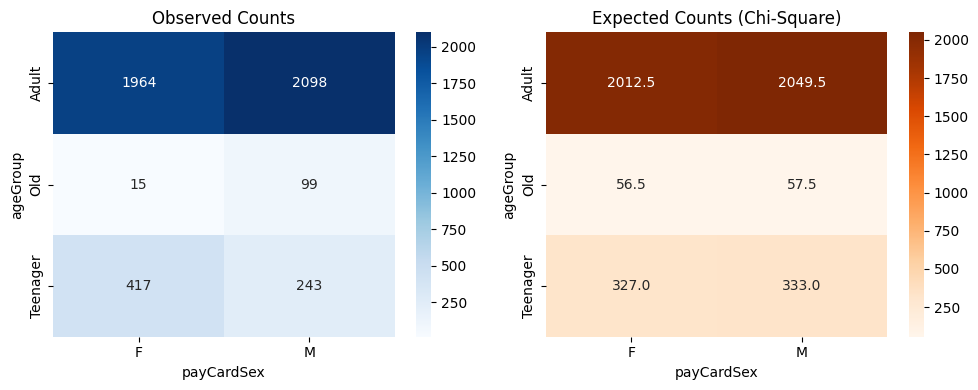

In [329]:
# Create a contingency table of age group vs gender
contingency_table = pd.crosstab(df_morning['ageGroup'], df_morning['payCardSex'])
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p}")

# Interpretation based on p-value
if p < 0.05:
    print("\nConclusion: There is a significant association between age group and gender in TransJakarta usage.")
else:
    print("\nConclusion: There is no significant association between age group and gender in TransJakarta usage.")

# Visualize observed vs expected counts using heatmaps
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

plt.figure(figsize=(10, 4))

# Observed counts
plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title("Observed Counts")

# Expected counts from Chi-Square test
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Oranges')
plt.title("Expected Counts (Chi-Square)")

plt.tight_layout()
plt.show()

The conclusion drawn from the analysis is that there is a significant difference in Transjakarta usage based on age group and gender, as supported by the results of the Chi-Square statistical test.

Now it's time to perform a focused age analysis on teenagers, from the age range of 10 to 18 years old.

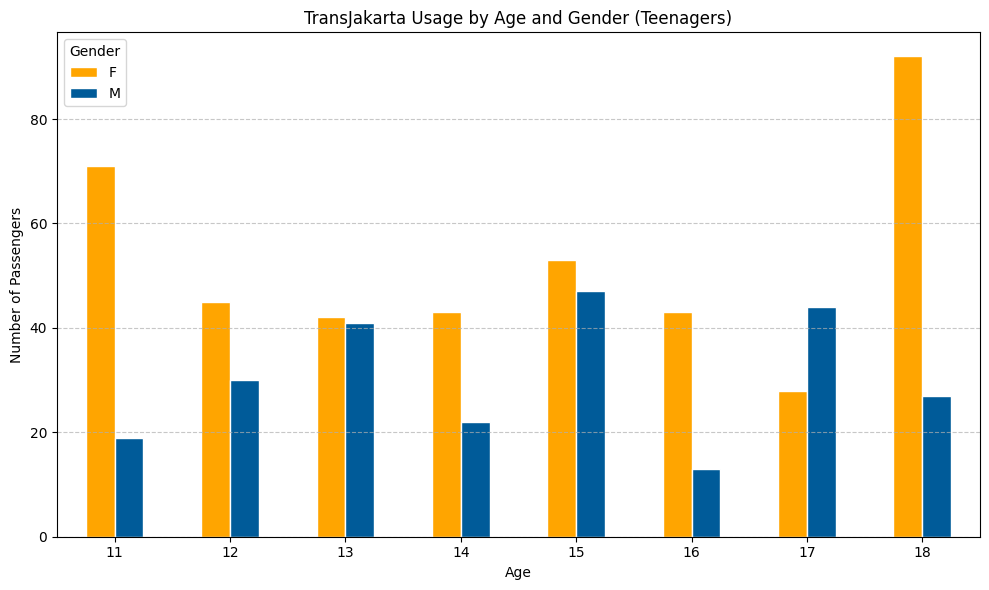

In [330]:
# Filter for teenagers only (ages 10 to 18)
teenagers = df_morning[(df_morning['age'] >= 10) & (df_morning['age'] <= 18)]

# Group by age and gender
age_gender_counts = teenagers.groupby(['age', 'payCardSex']).size().unstack(fill_value=0)

# Sort by age just in case
age_gender_counts = age_gender_counts.sort_index()

# Plot grouped bar chart
ax = age_gender_counts.plot(kind='bar', figsize=(10, 6), color=['#FFA500', '#005B99'], edgecolor='white')

# Labels and title
plt.title('TransJakarta Usage by Age and Gender (Teenagers)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

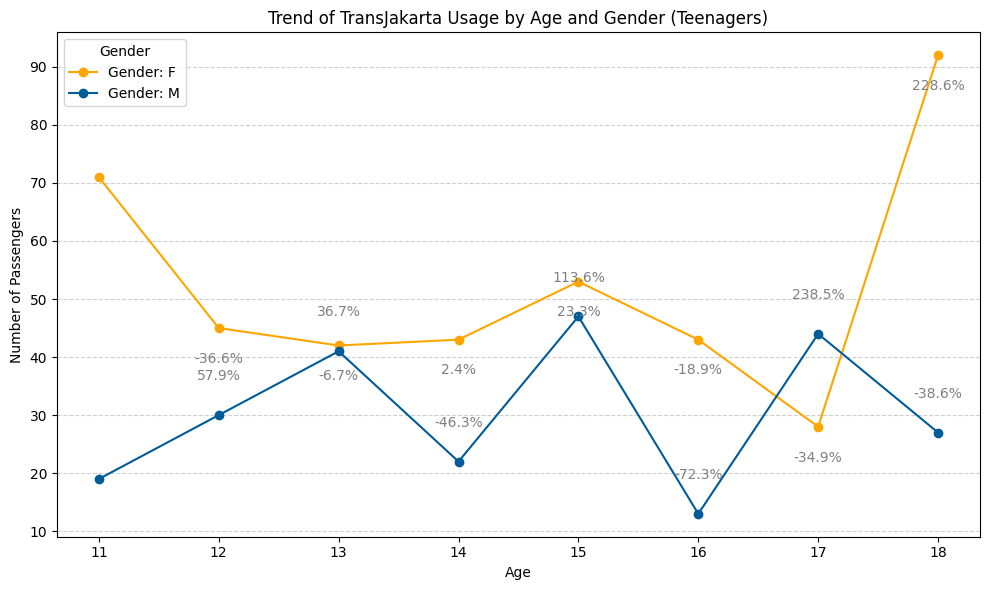

In [331]:
# Filter for teenagers age 10–18
teenagers = df_morning[(df_morning['age'] >= 10) & (df_morning['age'] <= 18)]

# Group by age and gender
age_gender_counts = teenagers.groupby(['age', 'payCardSex']).size().unstack(fill_value=0).sort_index()

# Custom colors
color_map = {
    'M': '#005B99',   # dark blue
    'F': '#FFA500'   # orange
}

# Plot line chart
plt.figure(figsize=(10, 6))
for gender in age_gender_counts.columns:
    plt.plot(age_gender_counts.index, age_gender_counts[gender],
             marker='o', label=f'Gender: {gender}', color=color_map.get(gender, 'gray'))

    # Calculate % change
    pct_change = age_gender_counts[gender].pct_change() * 100

    # Adjust label position slightly to avoid overlapping (offset by gender)
    offset = 6 if gender == 'M' else -6

    # Add % labels
    for age, pct in pct_change.items():
        if pd.notnull(pct):
            y = age_gender_counts[gender].loc[age] + offset
            plt.text(age, y, f'{pct:.1f}%', fontsize=10, ha='center', color='gray')

# Styling
plt.title('Trend of TransJakarta Usage by Age and Gender (Teenagers)')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.xticks(age_gender_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In this case, I used a trend line because the goal was not to show the distribution of passenger ages, but rather to highlight behavioral patterns during the **teenage phase**. At certain ages, there tends to be a noticeable increase or decrease, and a trend line is better suited to visualize these shifts in behavior over time.

1. In general, the number of female passengers using TransJakarta is consistently higher than male passengers, except at the age of 17.

2. A significant spike occurs at the age of 18. This is the age when students graduate from school and transition from adolescence to adulthood, gaining more freedom or having more reasons to travel, such as for work or university. This spike is more noticeable among females, as males tend to prefer using private vehicles due to their perceived convenience, such as greater flexibility, comfort, safety, and speed. Additionally, cultural norms in Indonesia often place more responsibility on men, and owning a private vehicle is commonly seen as a status symbol for males. A more detailed explanation can be found in the journal ***Dilema sosial pengguna transportasi Jakarta: Survai penilaian dan niat menggunakan transportasi publik di Jakarta*** by Parmono, V. R. (2018).

3. Besides that, the age of 18 is a transitional phase where [social prestige](https://www.kompasiana.com/syarifah1203/62b3f7247901697a8839d7f3/pengaruh-gengsi-terhadap-gaya-hidup-remaja-masa-kini) still plays a significant role in teenagers' lives. Therefore, the status-related issues mentioned in point 2 become even more relevant at this age.

4. Another contributing factor to the spike at age 18 may be the [Free School Bus](https://www.jakarta.go.id/bus-sekolah) program. This increase occurs because passengers at this age include both those who are still in school and those who have already graduated. Since graduates are no longer eligible to use the Free School Bus, they are more likely to switch to TransJakarta as an alternative means of public transportation.


## Analysis by Trip

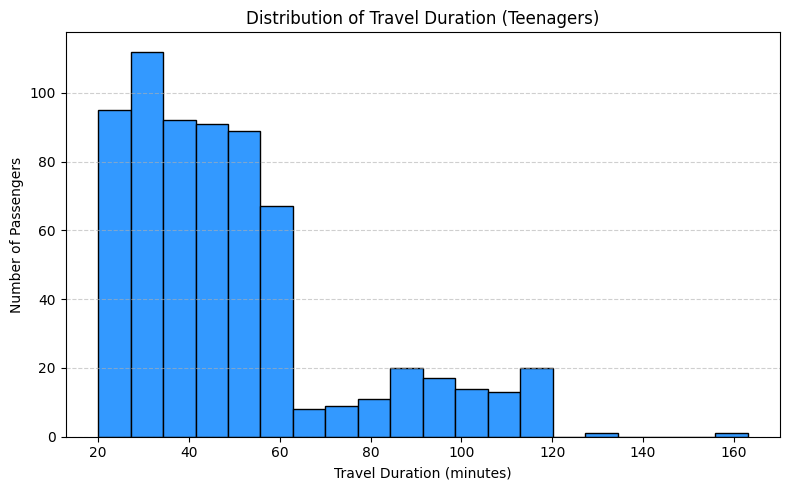

In [332]:
# Filter only students aged 10–18
students_10_18 = df_morning[(df_morning['age'] >= 10) & (df_morning['age'] <= 18)]

# Plot histogram of travel duration
plt.figure(figsize=(8, 5))
plt.hist(students_10_18['duration_minute'], bins=20, color='#3399FF', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Travel Duration (Teenagers)')
plt.xlabel('Travel Duration (minutes)')
plt.ylabel('Number of Passengers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

It can be observed that most users tend to take short-distance trips rather than long ones, with a maximum duration of 60 minutes. This is likely because students have a deadline to arrive at school on time.

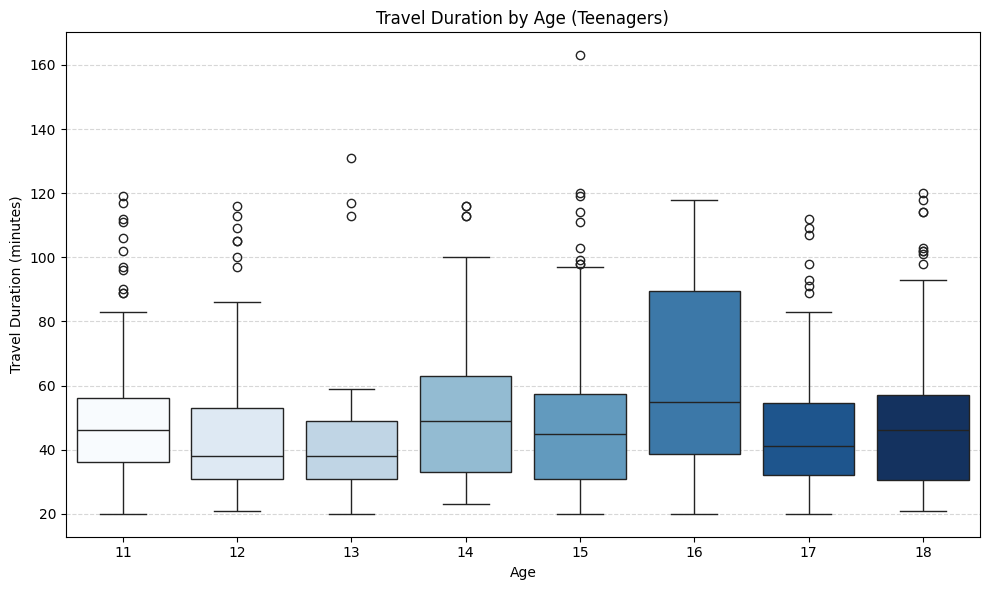

In [333]:
# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=students_10_18, x='age', y='duration_minute', hue='age', palette='Blues', legend=False)

# Add title and axis labels
plt.title('Travel Duration by Age (Teenagers)')
plt.xlabel('Age')
plt.ylabel('Travel Duration (minutes)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

The median travel duration remains relatively stable across all age groups, typically falling between **40** and **50** minutes. This suggests that, on average, students—regardless of age—experience similar commute lengths when using Transjakarta in the morning.

However, students aged **16** show the greatest variation in travel time, as indicated by the significantly taller box in the boxplot. Based on the previous chart showing the number of users by age, there is a noticeable decline at age **16**. This suggests that many students at this age may begin opting for alternative modes of transportation. As a result, the distribution of Transjakarta users at age **16** is likely dominated by students who have relatively long travel routes.

Outliers are consistently present across all ages, with some students traveling more than 100 minutes—nearly three hours. These extreme durations may indicate that certain students live far from their schools or from key TransJakarta hubs. Interestingly, many outliers also fall just above the Maximum value, with durations still under 100 minutes, suggesting that while they are technically outliers, their commute times are not drastically different from the upper end of the typical range.

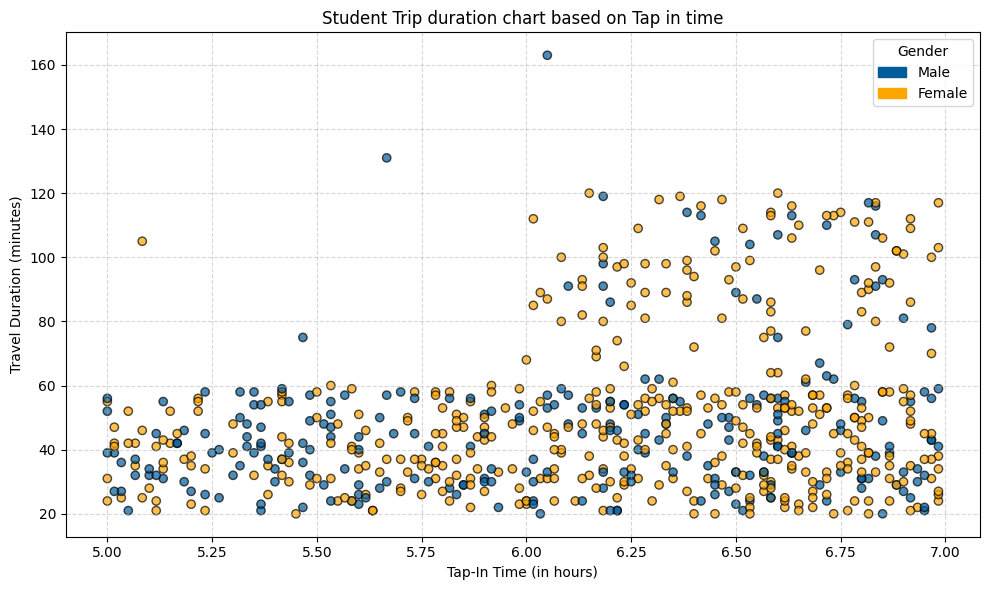

In [334]:
# Create new decimal time column safely
df_morning.loc[:, 'tapInDecimal'] = df_morning['tapInTime'].dt.hour + df_morning['tapInTime'].dt.minute / 60

# Filter for students aged 10–18
students_10_18 = df_morning[(df_morning['age'] >= 10) & (df_morning['age'] <= 18)].copy()

# Add decimal tap-in time to student dataframe
students_10_18['tapInDecimal'] = students_10_18['tapInTime'].dt.hour + students_10_18['tapInTime'].dt.minute / 60

# Map gender to colors: M = dark blue, F = orange
color_map = students_10_18['payCardSex'].map({
    'M': '#005B99',   # Dark blue for male
    'F': '#FFA500'    # Orange for female
})

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    students_10_18['tapInDecimal'],
    students_10_18['duration_minute'],
    c=color_map,
    alpha=0.7,
    edgecolor='black'
)

# Add titles and labels
plt.title('Student Trip duration chart based on Tap in time')
plt.xlabel('Tap-In Time (in hours)')
plt.ylabel('Travel Duration (minutes)')
plt.grid(True, linestyle='--', alpha=0.5)

# Custom legend
legend_elements = [
    mpatches.Patch(color='#005B99', label='Male'),
    mpatches.Patch(color='#FFA500', label='Female')  # Updated to orange
]
plt.legend(handles=legend_elements, title='Gender')

plt.tight_layout()
plt.show()

For departures between **5:00** and **6:00 AM**, the travel duration is relatively consistent, ranging between **20** to **60** minutes, which means most passengers would arrive at their destination by **7:00 AM** at the latest.

However, for tap-ins after **6:00 AM**, there is a subset of trips — although not the majority — that fall within the **60** to **120**-minute range.

These longer durations might indicate:

*   Passengers who are not heading to school, as the pattern does not represent the majority.
*   Personal matters, including health issues, card-related problems, or restroom use.





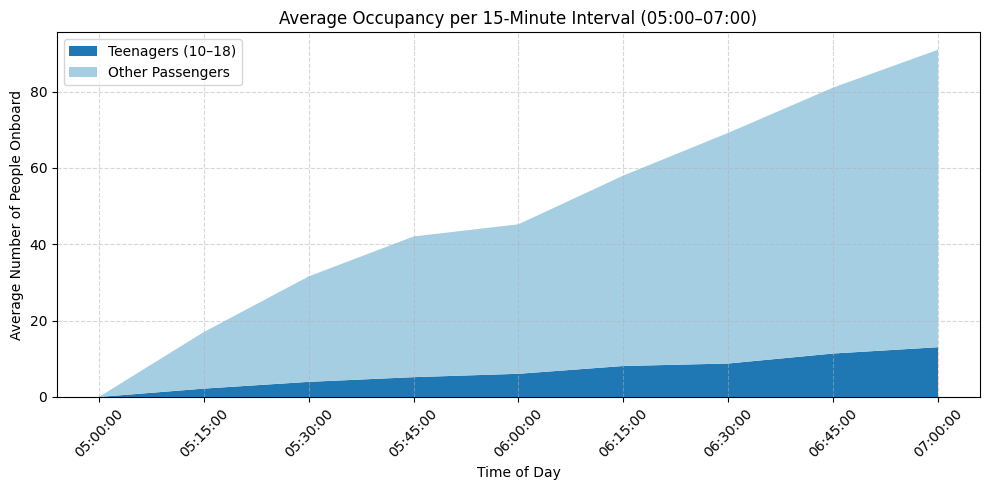

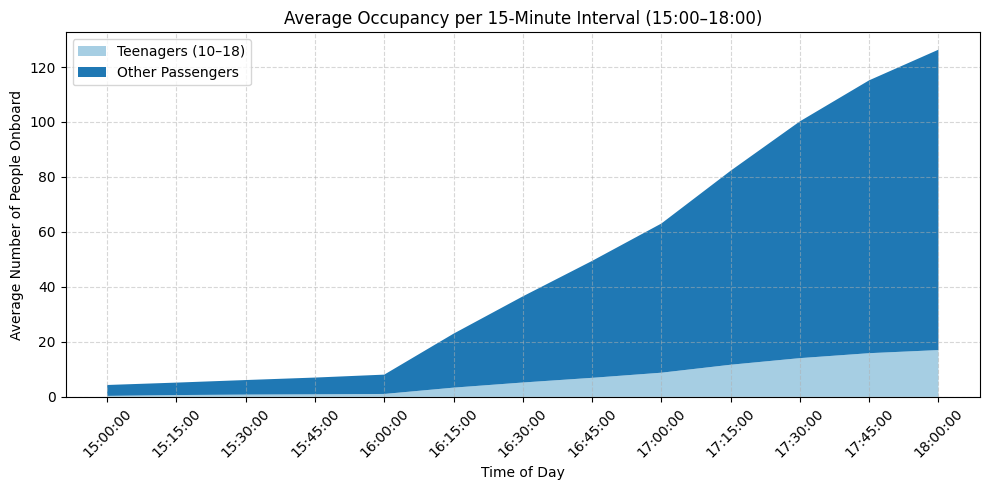

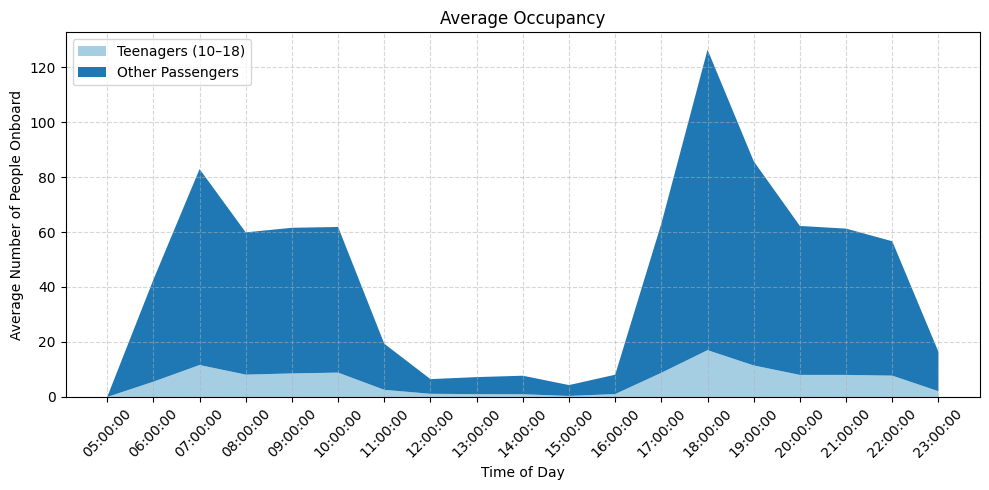

In [335]:
# Create 15-minute time intervals covering full time range
time_range = pd.date_range(
    start=df_morning['tapInTime'].min().floor('15min'),
    end=df_morning['tapOutTime'].max().ceil('15min'),
    freq='15min'
)

# Loop through intervals to calculate occupancy
occupancy_results = []

for current_time in time_range:
    total_onboard = ((df_morning['tapInTime'] <= current_time) &
                     (df_morning['tapOutTime'] > current_time))

    teen_onboard = total_onboard & df_morning['age'].between(10, 18)

    occupancy_results.append({
        'time': current_time,
        'total_passengers': total_onboard.sum(),
        'teenagers': teen_onboard.sum()
    })

occupancy_df = pd.DataFrame(occupancy_results)

# Filter to include only time between 05:00 and 07:00
occupancy_df['time_only'] = occupancy_df['time'].dt.time
occupancy_filtered = occupancy_df[
    (occupancy_df['time_only'] >= dtime(5, 0)) &
    (occupancy_df['time_only'] <= dtime(7, 0))
].copy()

# Group by time of day and calculate average occupancy
avg_occupancy = occupancy_filtered.groupby('time_only')[['total_passengers', 'teenagers']].mean().reset_index()
avg_occupancy['time_str'] = avg_occupancy['time_only'].astype(str)

# Plot area chart
plt.figure(figsize=(10, 5))

# Define blueish colors
colors = ['#1f78b4','#a6cee3']

plt.stackplot(
    avg_occupancy['time_str'],
    avg_occupancy['teenagers'],
    avg_occupancy['total_passengers'] - avg_occupancy['teenagers'],
    labels=['Teenagers (10–18)', 'Other Passengers'],
    colors=colors
)

plt.title("Average Occupancy per 15-Minute Interval (05:00–07:00)")
plt.xlabel("Time of Day")
plt.ylabel("Average Number of People Onboard")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Filter trips with tap-in time >= 05:00 and exclude 'JAK' corridors
df_full_day = df[
    (df['tapInTime'].dt.time >= dtime(5, 0)) &
    ~df['corridorID'].str.contains("JAK", case=False, na=False)
].copy()


# Generate 15-minute intervals covering the full time range
time_range_full_day = pd.date_range(
    start=df_full_day['tapInTime'].min().floor('15min'),
    end=df_full_day['tapOutTime'].max().ceil('15min'),
    freq='15min'
)

# Loop through intervals and compute onboard passenger count
occupancy_results_full_day = []

for current_time in time_range_full_day:
    total_onboard = ((df_full_day['tapInTime'] <= current_time) &
                     (df_full_day['tapOutTime'] > current_time))

    teen_onboard = total_onboard & df_full_day['age'].between(10, 18)

    occupancy_results_full_day.append({
        'time': current_time,
        'total_passengers': total_onboard.sum(),
        'teenagers': teen_onboard.sum()
    })

occupancy_df_full_day = pd.DataFrame(occupancy_results_full_day)

# Extract time-only column and filter 15:00 to 18:00 for plotting
occupancy_df_full_day['time_only'] = occupancy_df_full_day['time'].dt.time
occupancy_filtered_full_day = occupancy_df_full_day[
    (occupancy_df_full_day['time_only'] >= dtime(15, 0)) &
    (occupancy_df_full_day['time_only'] <= dtime(18, 0))
].copy()

# Group by time and calculate average occupancy per 15-minute interval
avg_occupancy_by_time_full_day = occupancy_filtered_full_day.groupby('time_only')[['total_passengers', 'teenagers']].mean().reset_index()
avg_occupancy_by_time_full_day['time_str'] = avg_occupancy_by_time_full_day['time_only'].astype(str)

# Plot area chart for 15:00 to 18:00
plt.figure(figsize=(10, 5))

colors = ['#a6cee3', '#1f78b4']  # Teenagers, Other Passengers

plt.stackplot(
    avg_occupancy_by_time_full_day['time_str'],
    avg_occupancy_by_time_full_day['teenagers'],
    avg_occupancy_by_time_full_day['total_passengers'] - avg_occupancy_by_time_full_day['teenagers'],
    labels=['Teenagers (10–18)', 'Other Passengers'],
    colors=colors
)

plt.title("Average Occupancy per 15-Minute Interval (15:00–18:00)")
plt.xlabel("Time of Day")
plt.ylabel("Average Number of People Onboard")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Generate 60-minute intervals covering the full time range
time_range_full_day = pd.date_range(
    start=df_full_day['tapInTime'].min().floor('60min'),
    end=df_full_day['tapOutTime'].max().ceil('60min'),
    freq='60min'
)

# Loop through intervals and compute onboard passenger count
occupancy_results_full_day = []

for current_time in time_range_full_day:
    total_onboard = ((df_full_day['tapInTime'] <= current_time) &
                     (df_full_day['tapOutTime'] > current_time))

    teen_onboard = total_onboard & df_full_day['age'].between(10, 18)

    occupancy_results_full_day.append({
        'time': current_time,
        'total_passengers': total_onboard.sum(),
        'teenagers': teen_onboard.sum()
    })

occupancy_df_full_day = pd.DataFrame(occupancy_results_full_day)

# Extract time-only column and filter 05:00 to 23:30 for plotting
occupancy_df_full_day['time_only'] = occupancy_df_full_day['time'].dt.time
occupancy_filtered_full_day = occupancy_df_full_day[
    (occupancy_df_full_day['time_only'] >= dtime(5, 0)) &
    (occupancy_df_full_day['time_only'] <= dtime(23, 00))
].copy()

# Group by time and calculate average occupancy per 60-minute interval
avg_occupancy_by_time_full_day = occupancy_filtered_full_day.groupby('time_only')[['total_passengers', 'teenagers']].mean().reset_index()
avg_occupancy_by_time_full_day['time_str'] = avg_occupancy_by_time_full_day['time_only'].astype(str)

# Plot area chart for 05:00 to 23:30
plt.figure(figsize=(10, 5))

colors = ['#a6cee3', '#1f78b4']  # Teenagers, Other Passengers

plt.stackplot(
    avg_occupancy_by_time_full_day['time_str'],
    avg_occupancy_by_time_full_day['teenagers'],
    avg_occupancy_by_time_full_day['total_passengers'] - avg_occupancy_by_time_full_day['teenagers'],
    labels=['Teenagers (10–18)', 'Other Passengers'],
    colors=colors
)

plt.title("Average Occupancy")
plt.xlabel("Time of Day")
plt.ylabel("Average Number of People Onboard")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

From this, we can see that Transjakarta’s peak hours are actually linked to student's departure and return times.

"The peak hour in the morning is around **06:00** to **08:00**.
This is the time when students are heading to school alongside workers commuting to their jobs.

From **08:00** to **10:00**, the traffic remains relatively high.
It then starts to decrease between **10:00** and **15:00**.

Rush hour returns from **16:00**, reaching its peak around **18:00**.
This time frame corresponds to when students are returning home from school along with workers finishing their workday.

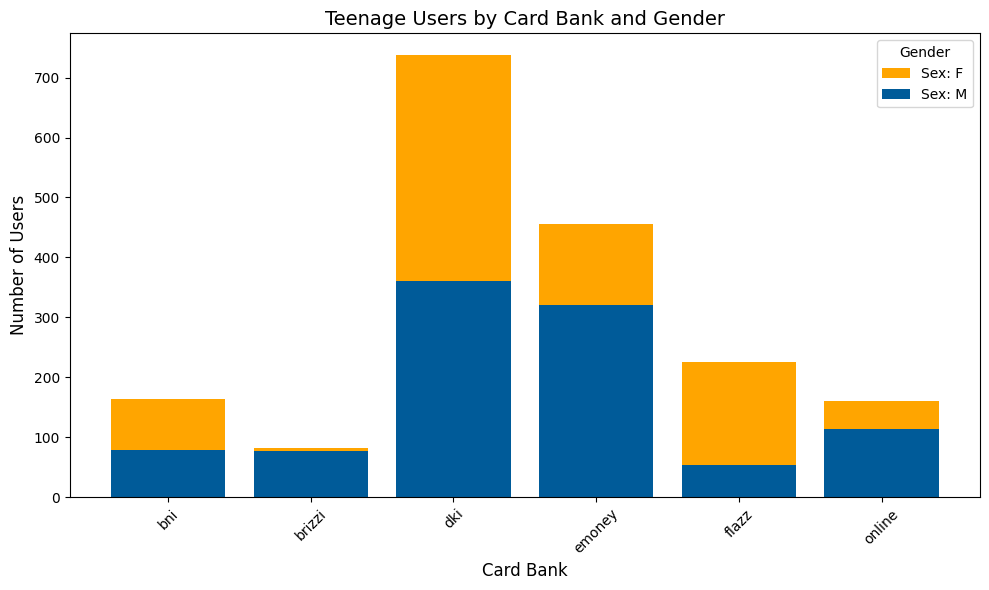

In [336]:
# Filter age between 10 and 18 years old
df_teen = df_full_day[(df_full_day['age'] >= 10) & (df_full_day['age'] <= 18)]

# Group the data by card bank and gender
df_grouped = df_teen.groupby(['payCardBank', 'payCardSex']).size().reset_index(name='count')

# Define custom colors: 'M' (male) = blue, 'F' (female) = orange
gender_colors = {'M': '#005B99', 'F': '#FFA500'}

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each gender group with correct color
for gender in df_grouped['payCardSex'].unique():
    subset = df_grouped[df_grouped['payCardSex'] == gender]
    plt.bar(
        subset['payCardBank'],
        subset['count'],
        label=f'Sex: {gender}',
        color=gender_colors.get(gender, 'gray')  # Default to gray if unknown
    )

# Add titles and labels
plt.title('Teenage Users by Card Bank and Gender', fontsize=14)
plt.xlabel('Card Bank', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()

Bank **DKI** is the most commonly used bank.

In terms of gender distribution, it is **relatively balanced**.

Bank DKI dominates usage because the JakCard or Jaklingko card, is issued by Bank DKI. Additionally, there are certain privileges available—such as registering for free fare policy—if specific requirements are met.

## Conclusion & Recommendation

**Conclusion**


Based on demographic data, passengers traveling in the early morning **(05:00–07:00 AM)** are predominantly adults **(83.9%)**, followed by teenagers **(13.7%)** and a small portion of elderly passengers **(2.4%)**.

Among teenagers, the majority of riders are female. Across the **11–18** age range, **females dominate** in most age groups, except at age **17**. This may be due to the higher popularity of private vehicles among male teenagers.

Here is a significant decrease in the number of male Transjakarta users at the age of **16**. This may be due to the behavior of teenage boys at that age, who tend to prefer using private vehicles.

As for departure performance, Transjakarta appears to maintain a consistent schedule, especially between **05:00–06:00 AM**, with most trips completing before **07:00 AM**. This indicates good **on-time performance** during early hours.

Transjakarta experiences peak occupancy during rush hours at **07:00 AM** and **06:00 PM**. Unfortunately, this overlaps with the travel times of both students and workers, increasing the likelihood of overcrowding.

**Bank DKI** is the **most frequently used bank**, with relatively equal distribution between male and female users. This is likely due to the fact that Bank DKI issues JakCard and Jaklingko card, the primary payment card for TransJakarta rides.

**Recommendation**

With the goal of encouraging students—especially those underage and without a driver's license—to choose Transjakarta over private vehicles (which is not only illegal but also contributes to congestion and pollution in Jakarta), the following actionable recommendations are proposed for Transjakarta’s public relations and marketing teams:

For TransJakarta Public Relations:
1. Leverage Social Media for Awareness Campaigns
Targeting Gen Z—who are [highly active on social media](https://databoks.katadata.co.id/teknologi-telekomunikasi/statistik/cc9c63b6b015cc3/media-sosial-jadi-sumber-utama-gen-z-dalam-mengakses-berita) and rely on it as a primary source of information, Transjakarta can run informative campaigns highlighting that it is a reliable and timely alternative for commuting to school.

2. Use Male Students in Visual Campaigns
To counter the perception that riding a private vehicle is a status symbol for "boys", to be specific is highschool boys since a massive declining of teenage boys at **16** years old from using Transjakarta. Visual content featuring male students commuting with Transjakarta can help normalize male students to use public transit as a practical, flexible, and efficient option.

3. Promote a Safe Environment for Female Passengers

  Demographic data also shows that a higher female number of Teenager that using Transjakarta, which highlights the importance of ensuring a sense of safety for them.
  According to this report, cases of sexual harassment involving women, including underage girls, are often unreported due to [various reasons](https://rri.co.id/index.php/lain-lain/1232233/alasan-meningkatnya-pelecehan-di-transportasi-umum). Therefore, further education and awareness efforts are needed. These can be carried out through social media campaigns and also through visible signs inside TransJakarta buses, encouraging passengers to speak up if they witness or experience sexual harassment.

4. Improve and Promote Complaint Mechanisms
While TransJakarta already has a complaint system via its app, it remains inefficient according to [user feedback](https://apps.apple.com/id/app/tj-transjakarta/id6502437836). The app needs significant improvement to provide fast, intuitive reporting—similar to those implemented in other [developed countries](https://www.liputan6.com/hot/read/3978243/keren-jepang-andalkan-aplikasi-ini-untuk-lawan-pelecehan-di-tempat-umum?page=2).

For Transjakarta’s marketing team:

The JakCard or Jaklingko Card, which is the most widely used payment method among teenagers, should be made more appealing. One approach is to create collaborations with brands or public figures that are popular among the youth. This strategy has already been implemented by competing banks, showing its effectiveness in attracting the younger demographic.

Here is the comparison between Bank DKI against competitors.

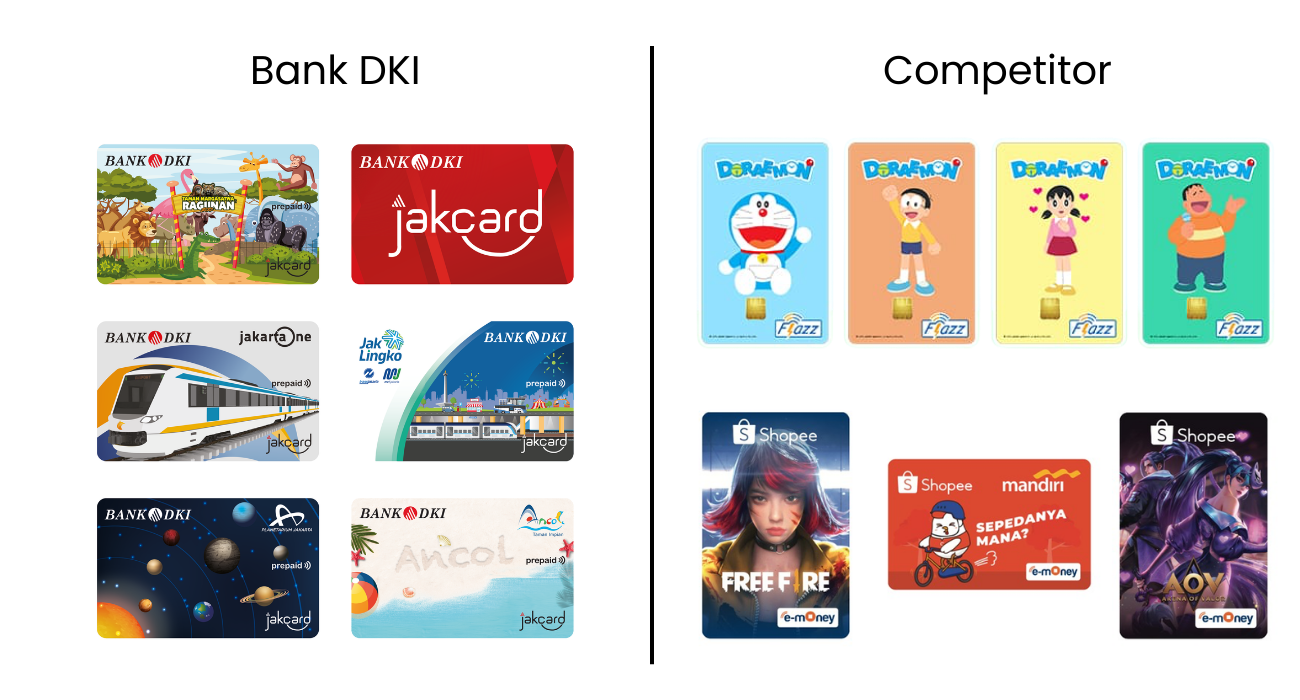

In [337]:
display(Image(filename='/content/drive/MyDrive/Asset Capstone 2/dki_vs_competitor.png', width = 800))